Price of Vanilla Call from simulation: 166.17424415054208 



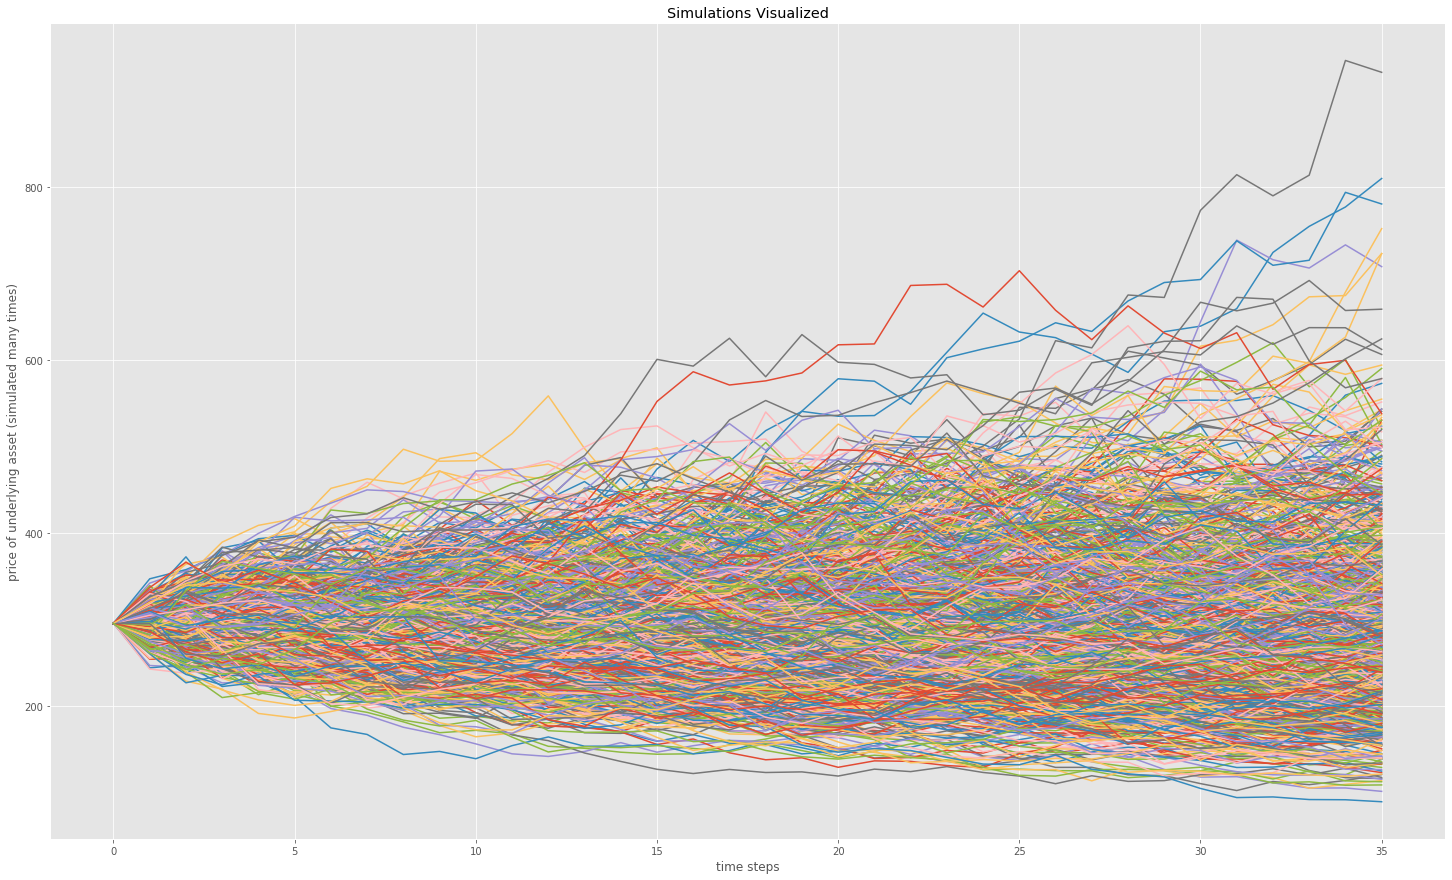

In [1]:
import numpy as np
import math 
import matplotlib.pyplot as plt

import warnings
warnings.filterwarnings("ignore")
from matplotlib import style
style.use('ggplot')

plt.figure(figsize = (25 , 15))

class StochasticProcess:

  def time_step(self):                                            #model for Geometric Brownian Motion
    dW = np.random.normal(0, math.sqrt(self.delta_t))
    dS = self.drift*self.current_asset_price*self.delta_t + self.asset_volatility*self.current_asset_price*dW
    self.asset_prices.append(self.current_asset_price +dS)
    self.current_asset_price = self.current_asset_price + dS

  def __init__ (self , asset_price , drift , delta_t , asset_volatility):
    self.current_asset_price = asset_price
    self.asset_prices = [] 
    self.asset_prices.append(asset_price) 
    self.drift = drift
    self.delta_t = delta_t 
    self.asset_volatility = asset_volatility

  
class Call :
  def __init__(self , strike):
    self.strike = strike

class EuroCallSimulation: 

  def __init__(self , Call , n_options , initial_asset_price , drift, delta_t , volatility, time_to_exp , risk_free_rate ):
    stochastic_processes = [] 
    for i in range(0 , n_options):
      stochastic_processes.append(StochasticProcess(initial_asset_price , drift, delta_t , volatility))

    
    for stochastic_process in stochastic_processes:
      tte = time_to_exp 
      while ((tte - stochastic_process.delta_t) > 0  ):
        tte = tte - stochastic_process.delta_t 
        stochastic_process.time_step() 
    
    payoffs = [] 
    for stochastic_process in stochastic_processes:
      payoff = stochastic_process.asset_prices[len(stochastic_process.asset_prices) - 1] - Call.strike 
      z = payoff if payoff > 0 else 0  #payoff is simulated price of option at the end of the simulation
      payoffs.append(z)                #this Payoff is what will be a suitable price for the derivative(option)
      plt.plot(stochastic_process.asset_prices)
    self.price = np.average(payoffs)*math.exp(-time_to_exp*risk_free_rate) #taking average of all simulations and discounting to PV


plt.xlabel('time steps')
plt.ylabel('price of underlying asset (simulated many times)')
plt.title('Simulations Visualized')

temp =  EuroCallSimulation(Call(130) , 1000 , 295.48 , 0 , 1/365 , 1.0625 , 36/365, 0.08).price
print('Price of Vanilla Call from simulation:' , temp,  '\n' )